## 1. Set up the environment and import data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
os.chdir("/Users/zhouyu/Documents/Zhou_Yu/DS/kaggle_challenge/House price/")

In [2]:
dataset = pd.read_csv('train.csv')

dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
testset  = pd.read_csv("test.csv")
testset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 2. Visualization and preprocessing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
dataset.columns[dataset.isnull().sum()>0]

Index([u'LotFrontage', u'Alley', u'MasVnrType', u'MasVnrArea', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'Electrical', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature'],
      dtype='object')

In [6]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
testset.columns[testset.isnull().sum()>0]

Index([u'MSZoning', u'LotFrontage', u'Alley', u'Utilities', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'MasVnrArea', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'BsmtFullBath',
       u'BsmtHalfBath', u'KitchenQual', u'Functional', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars',
       u'GarageArea', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature', u'SaleType'],
      dtype='object')

In [8]:
dataset_exp = dataset; # create an experimental dataset
testset_exp = testset; # create an experimental testset
#split daataset_exp into features and target
feas = dataset_exp.shape[1]
X_train = dataset_exp.iloc[:,:feas-1]
y_target = dataset_exp['SalePrice']
print "Train data shape is:", X_train.shape
print "target data shape is:", y_target.shape
X = X_train.append(testset_exp,ignore_index = True)
print "all features shape is:", X.shape

Train data shape is: (1460, 80)
target data shape is: (1460,)
all features shape is: (2919, 80)


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [10]:
X.index.is_unique

True

### 2.1 Missing value: Categorical type -> change it to "Mis"

In [11]:
# change null in all object columns to 'NA'
cat_cols = [] # all categorical features
cat_n_cols = [] # all categorical features that contained null values
n_cols = [] # all numerical features
for i in X.columns:
    if X[i].dtype == 'object':
        if X[i].isnull().sum()>0:
            cat_n_cols.append(i);
        X[i].fillna("Mis", inplace = True) # do not forget in place
        cat_cols.append(i);
    else:
        n_cols.append(i)
print "Here are all categorical data: ",'||'.join(cat_cols)
print "Here are all categorical data that contains missing values: ",'||'.join(cat_n_cols)
print "Here are all numerical data: ",'||'.join(n_cols)

Here are all categorical data:  MSZoning||Street||Alley||LotShape||LandContour||Utilities||LotConfig||LandSlope||Neighborhood||Condition1||Condition2||BldgType||HouseStyle||RoofStyle||RoofMatl||Exterior1st||Exterior2nd||MasVnrType||ExterQual||ExterCond||Foundation||BsmtQual||BsmtCond||BsmtExposure||BsmtFinType1||BsmtFinType2||Heating||HeatingQC||CentralAir||Electrical||KitchenQual||Functional||FireplaceQu||GarageType||GarageFinish||GarageQual||GarageCond||PavedDrive||PoolQC||Fence||MiscFeature||SaleType||SaleCondition
Here are all categorical data that contains missing values:  MSZoning||Alley||Utilities||Exterior1st||Exterior2nd||MasVnrType||BsmtQual||BsmtCond||BsmtExposure||BsmtFinType1||BsmtFinType2||Electrical||KitchenQual||Functional||FireplaceQu||GarageType||GarageFinish||GarageQual||GarageCond||PoolQC||Fence||MiscFeature||SaleType
Here are all numerical data:  Id||MSSubClass||LotFrontage||LotArea||OverallQual||OverallCond||YearBuilt||YearRemodAdd||MasVnrArea||BsmtFinSF1||BsmtFin

In [12]:
n_n_cols = X.columns[X.isnull().sum()>0]
print "Numerical features with missing values:","||".join(n_n_cols)

Numerical features with missing values: LotFrontage||MasVnrArea||BsmtFinSF1||BsmtFinSF2||BsmtUnfSF||TotalBsmtSF||BsmtFullBath||BsmtHalfBath||GarageYrBlt||GarageCars||GarageArea


In [13]:
import seaborn as sns

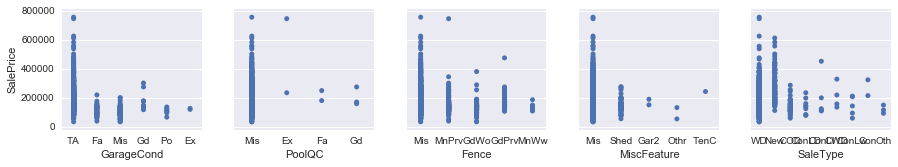

In [15]:
# visualize the manipulation of setting missing value to Mis category
g = sns.PairGrid(pd.concat([X.iloc[:1459,:],y_target],axis =1),x_vars = cat_n_cols[18:], y_vars = "SalePrice")
g = g.map(sns.stripplot);
# possibly delete some columns that a large propotion is missing values (given that those missing values show 
# no obvious correlation with price

In [16]:
# as for PoolQC has lots of missing values and also there is
# no obvious correlation between these features and sales Price
# here I just drop it
X.drop(['PoolQC'],axis = 1, inplace = True)

### 2.2 missing value: float type

In [17]:
X[n_n_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 11 columns):
LotFrontage     2433 non-null float64
MasVnrArea      2896 non-null float64
BsmtFinSF1      2918 non-null float64
BsmtFinSF2      2918 non-null float64
BsmtUnfSF       2918 non-null float64
TotalBsmtSF     2918 non-null float64
BsmtFullBath    2917 non-null float64
BsmtHalfBath    2917 non-null float64
GarageYrBlt     2760 non-null float64
GarageCars      2918 non-null float64
GarageArea      2918 non-null float64
dtypes: float64(11)
memory usage: 250.9 KB


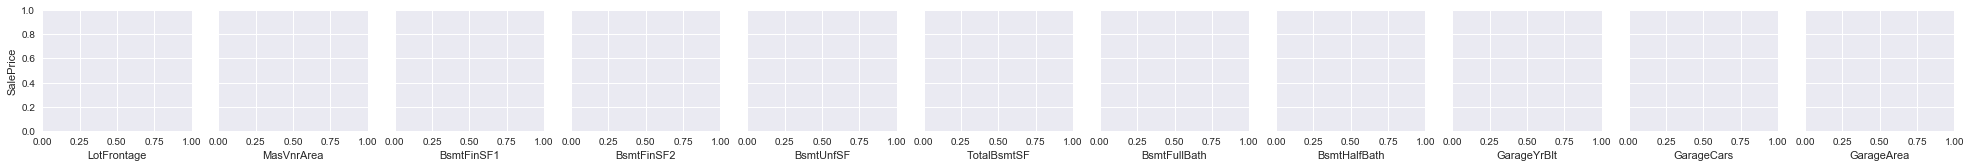

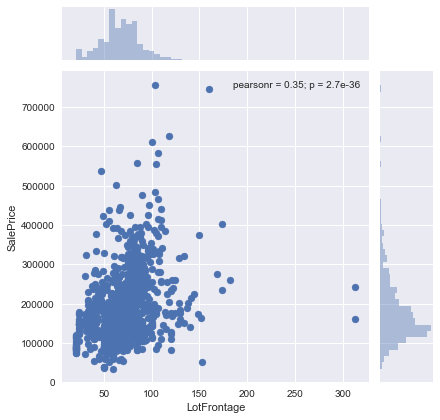

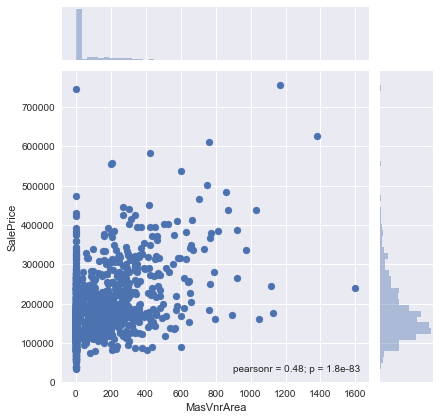

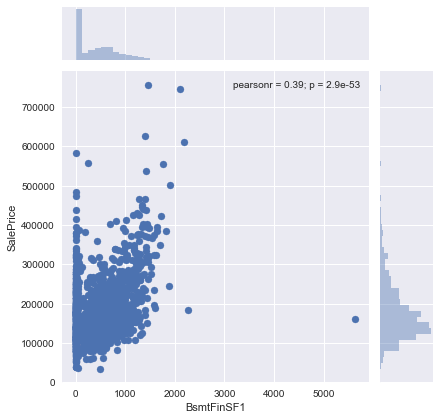

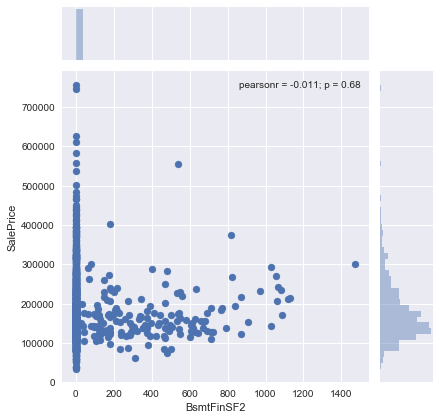

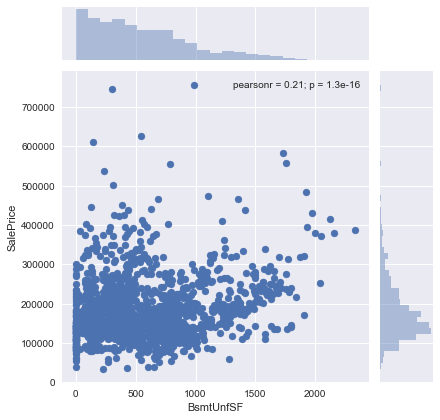

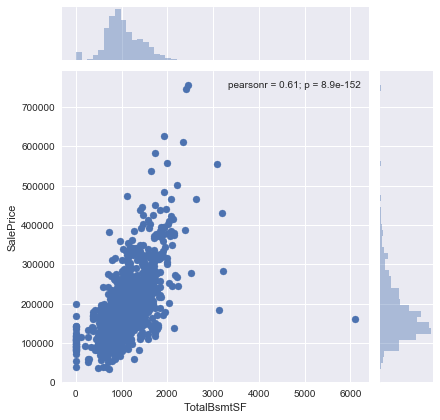

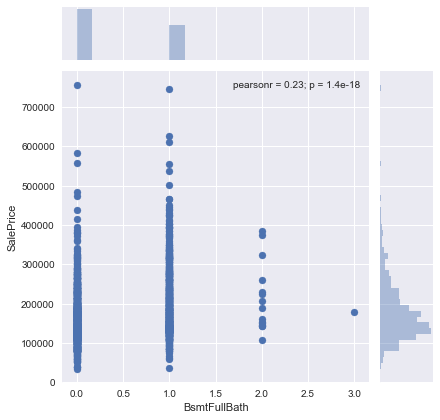

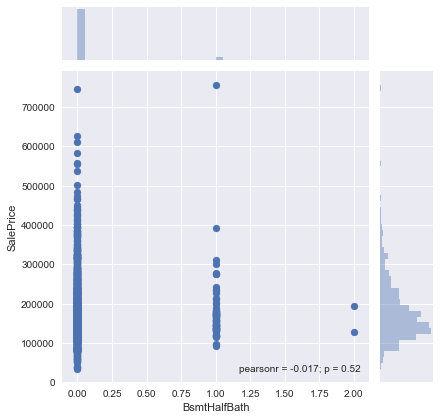

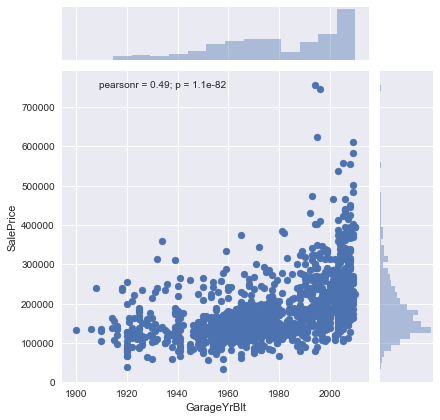

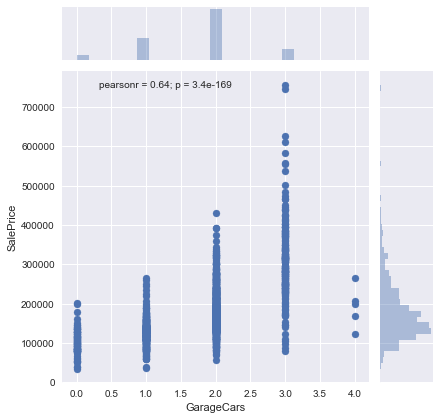

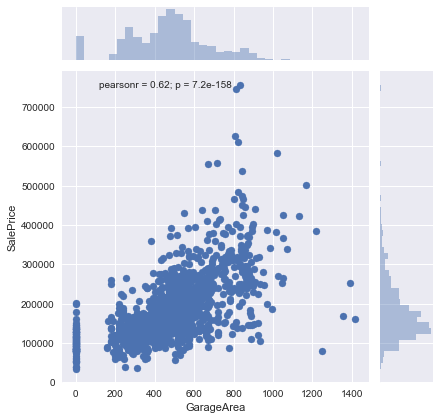

In [19]:
g = sns.PairGrid(pd.concat([X.iloc[:1459,:],y_target],axis =1),x_vars = n_n_cols, y_vars = "SalePrice", dropna = False)
g = g.map(sns.jointplot);

In [20]:
# fill the na value with median 
X.fillna(X.median()[n_n_cols], inplace = True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Mis,Reg,Lvl,AllPub,...,0,0,0,Mis,Mis,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Mis,Reg,Lvl,AllPub,...,0,0,0,Mis,Mis,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,Mis,IR1,Lvl,AllPub,...,0,0,0,Mis,Mis,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,Mis,IR1,Lvl,AllPub,...,0,0,0,Mis,Mis,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,Mis,IR1,Lvl,AllPub,...,0,0,0,Mis,Mis,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,Mis,IR1,Lvl,AllPub,...,320,0,0,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,Mis,Reg,Lvl,AllPub,...,0,0,0,Mis,Mis,0,8,2007,WD,Normal
7,8,60,RL,68.0,10382,Pave,Mis,IR1,Lvl,AllPub,...,0,0,0,Mis,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,Mis,Reg,Lvl,AllPub,...,0,0,0,Mis,Mis,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,Mis,Reg,Lvl,AllPub,...,0,0,0,Mis,Mis,0,1,2008,WD,Normal


In [21]:
X.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Mis,Reg,Lvl,AllPub,...,0,0,0,Mis,Mis,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Mis,Reg,Lvl,AllPub,...,0,0,0,Mis,Mis,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,Mis,IR1,Lvl,AllPub,...,0,0,0,Mis,Mis,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,Mis,IR1,Lvl,AllPub,...,0,0,0,Mis,Mis,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,Mis,IR1,Lvl,AllPub,...,0,0,0,Mis,Mis,0,12,2008,WD,Normal


# 3. Testing different predictive models

### 3.1 Features are highly correlated

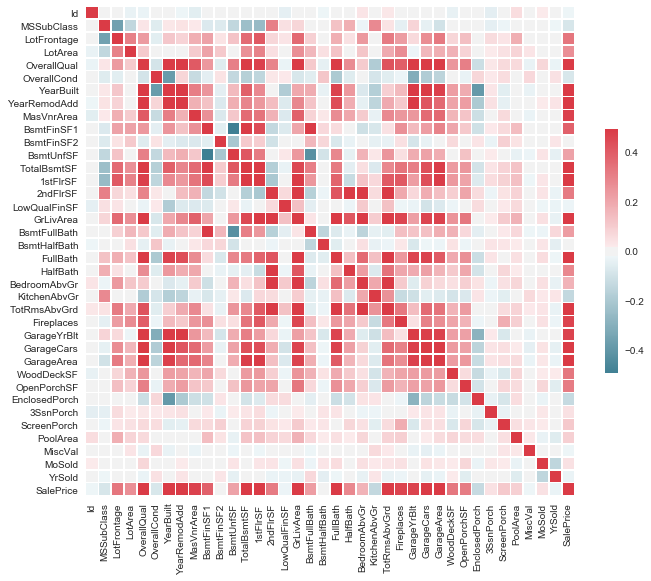

In [23]:
import matplotlib.pylab as plt
import numpy as np
train_set = pd.concat([X.iloc[:1459,:],y_target],axis = 1)
corr = train_set.corr()
sns.set(style = "white")
f,ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
mask = np.zeros_like(corr,dtype = np.bool)
sns.heatmap(corr,mask = mask,cmap = cmap, vmax=.3,square = True, linewidths = .5,
            cbar_kws = {"shrink": .5},ax = ax)

## 3.2 Convert categorical data to numerical data


In [26]:
num_features = 0
cat_cols.remove('PoolQC')
for i in cat_cols:
    temp = len(X[i].unique())
    num_features+=temp
    #print i,"with %d unique values"%(temp)
    print X[i].value_counts()
    if temp >10:
        print "feature",i,"has %d features"%temp
        #print X[i].value_counts()
print "There are total of %d features after converting %d features"%(num_features,len(cat_cols
                                                                                     ))
# if we convert every feature with one hot encoder 259 features + ~37 numerical data
# that is almost ~20% of the training data
# To reduce the dimensinality
#1. match the data with test set
#2. eliminat some really sparse features

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Mis           4
Name: MSZoning, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64
Mis     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
AllPub    2916
Mis          2
NoSeWa       1
Name: Utilities, dtype: int64
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkV

### 3.2.1 convert all categorical features into numerical with one hot encoder

In [27]:
# convert different features into numbers
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
X_cat = X[cat_cols].apply(lambda x:d[x.name].fit_transform(x))
# convert different numbers into a binary sparse matrix
from sklearn.preprocessing import OneHotEncoder
Ohe = OneHotEncoder(sparse = False)
Ohe.fit(X_cat)
X_cat = Ohe.transform(X_cat) 
X_cat = pd.DataFrame(X_cat)
print "Total number of cols after conversaion: %d"%X_cat.shape[0]
print X_cat.shape
X_n = X[n_cols]
X_allcat = pd.concat([X_cat,X_n],axis = 1)
print " the new feature matrix has the shape",X_allcat.shape

Total number of cols after conversaion: 2919
(2919, 271)
 the new feature matrix has the shape (2919, 308)


### 3.2.2 Ged rid of part of one hot encoded features that have less than 5 points

In [108]:
col_sparse = []
for i in X_allcat.columns:
    if len((X_allcat[i].nonzero())[0])<=1:
        col_sparse.append(i)
print len(col_sparse)

17


In [109]:
X_2 = X_allcat.drop(col_sparse, axis = 1)
print "the non-sparse features matrix has the shape", X_2.shape

the non-sparse features matrix has the shape (2919, 291)


## 3.3.1 Split the trainning data, validation data and test data

In [95]:
# split the data into festures and target
from sklearn.model_selection import train_test_split
X_train_a = X_allcat.iloc[:1460,:]
X_test_a = X_allcat.iloc[1460:,:]
y_target = dataset_exp['SalePrice']
X_train,X_val,y_train,y_val = train_test_split(X_train_a,y_target,test_size = 0.1,random_state = 1)
print "Trainning set shape is:", X_train.shape
print "Val set shape is:" ,X_val.shape
print "y_train shape is:", y_train.shape
print "y_val is:", y_val.shape

 Trainning set shape is: (1314, 308)
Test set shape is: (146, 308)
y_train shape is: (1314,)
y_test is: (146,)


In [110]:
from sklearn.model_selection import train_test_split
X_train_a = X_2.iloc[:1460,:]
X_test_a = X_2.iloc[1460:,:]
y_target = dataset_exp['SalePrice']
X_train,X_val,y_train,y_val = train_test_split(X_train_a,y_target,test_size = 0.1,random_state = 1)
print "Trainning set shape is:", X_train.shape
print "Val set shape is:" ,X_val.shape
print "y_train shape is:", y_train.shape
print "y_val is:", y_val.shape

Trainning set shape is: (1314, 291)
Val set shape is: (146, 291)
y_train shape is: (1314,)
y_val is: (146,)


In [98]:
X_test_a['LotArea'].head(5) # just to validate on any mistakes on the indices

1460    11622
1461    14267
1462    13830
1463     9978
1464     5005
Name: LotArea, dtype: int64

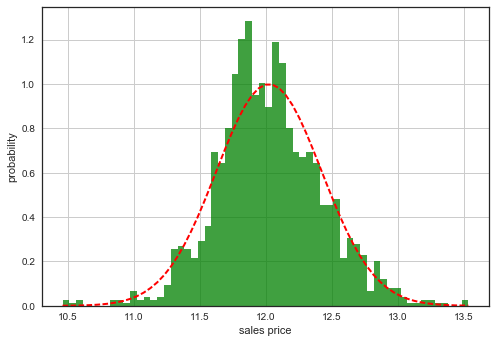

In [190]:
# exammine the distribution of lg target
import matplotlib.mlab as mlab
from scipy.stats import norm,lognorm
lg_y_target = np.log(y_target)
(mu,sigma) = norm.fit(lg_y_target)
n,bins,pathes = plt.hist(lg_y_target,60,normed = 1,facecolor = 'green',alpha = 0.75)
y = mlab.normpdf(bins,mu,sigma)
l = plt.plot(bins,y,'r--',linewidth = 2)
plt.xlabel('sales price')
plt.ylabel('probability')
plt.grid(True)
plt.show()

## 3.3.2 Random Forest

In [143]:
# Machine learing methods selection:
#1. Random Forest # use RMSE to evaluate results
lg_y_train = np.log(y_train)
lg_y_val = np.log(y_val)
from sklearn.ensemble import RandomForestRegressor
#rf_dict = {}
for n_est in np.arange(80,120,10):
    rf = RandomForestRegressor(n_estimators = n_est)
    forest = rf.fit(X_train,y_train)
    y_train_pred = np.log(rf.predict(X_train))
    y_val_pred = np.log(rf.predict(X_val))
    #train_score = rf.score(X_train,y_train)
    #res_score = rf.score(X_val,y_val)
    train_score = mean_squared_error(lg_y_train,y_train_pred)
    res_score = mean_squared_error(lg_y_val,y_val_pred)
    print "n_estimators: ",n_est
    print "tainning set score is:", sqrt(train_score),"Val set score is:", sqrt(res_score)
    rf_dict[n_est] = (train_score, res_score)
# 110 random estimators seem to be a not bad choice

n_estimators:  80
tainning set score is: 0.0610901727653 Val set score is: 0.145063492725
n_estimators:  90
tainning set score is: 0.0602490627117 Val set score is: 0.15100943255
n_estimators:  100
tainning set score is: 0.0608007546421 Val set score is: 0.14847370254
n_estimators:  110
tainning set score is: 0.0617911921286 Val set score is: 0.148686755011


In [132]:
#2 Random Forest with log normalized target (worse than raw values)
lg_y_train = np.log(y_train)
lg_y_val = np.log(y_val)
rf_log_dic = {}
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
for n_est in np.arange(50,200,10):
    rf = RandomForestRegressor(n_estimators = n_est)
    forest = rf.fit(X_train,lg_y_train)
    y_train_pred = rf.predict(X_train)
    y_val_pred = rf.predict(X_val)
    #train_score = r2_score(y_train,y_train_pred)
    train_score = mean_squared_error(lg_y_train,y_train_pred)
    #res_score = r2_score(y_val,y_val_pred)
    res_score = mean_squared_error(lg_y_val,y_val_pred)
    print "n_estimators: ",n_est
    print "tainning set score is:", sqrt(train_score),"Val set score is:", sqrt(res_score)
    rf_dict[n_est] = (train_score, res_score)

n_estimators:  50
tainning set score is: 0.0554601247001 Val set score is: 0.148722076153
n_estimators:  60
tainning set score is: 0.0563301270892 Val set score is: 0.147161436945
n_estimators:  70
tainning set score is: 0.0554728222897 Val set score is: 0.152774440825
n_estimators:  80
tainning set score is: 0.0556105617524 Val set score is: 0.149432445324
n_estimators:  90
tainning set score is: 0.0548168186271 Val set score is: 0.151470035362
n_estimators:  100
tainning set score is: 0.0544718825814 Val set score is: 0.151172233315
n_estimators:  110
tainning set score is: 0.0536678357592 Val set score is: 0.151423948131
n_estimators:  120
tainning set score is: 0.0540466106419 Val set score is: 0.14915901847
n_estimators:  130
tainning set score is: 0.054438260873 Val set score is: 0.152756219955
n_estimators:  140
tainning set score is: 0.0540960690272 Val set score is: 0.149193997152
n_estimators:  150
tainning set score is: 0.0547520894748 Val set score is: 0.148188454217
n_esti

## 3.3.3 XGboost

In [128]:
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree= 0.2,gamma = 0.0,learning_rate = 0.005,max_depth = 6,
                        min_child_weight = 2,n_estimators = 7200,reg_alpha = 0.9,
                        reg_lambda = 0.6,
                        subsample=0.3,
                        seed = 40,
                        silent = 1)

In [129]:
from sklearn.metrics import mean_squared_error
from math import sqrt
lg_y_train = np.log(y_train)
lg_y_val = np.log(y_val)
regr.fit(X_train,lg_y_train)
y_val_pred = regr.predict(X_val)
score = mean_squared_error(lg_y_val,y_val_pred)
#print r2_score(y_val,y_val_pred)
print sqrt(score)

0.113734846132


### 3.3.4 Lasso

In [171]:
from sklearn.linear_model import Lasso
#alpha = 0.00099
alpha_1 =0.00029
las = Lasso(alpha = alpha_1, max_iter = 50000)
las.fit(X_train,lg_y_train)
y_val_pred = las.predict(X_val)
score = mean_squared_error(lg_y_val,y_val_pred)
print sqrt(score)

0.118649673226


(11, 13.5)

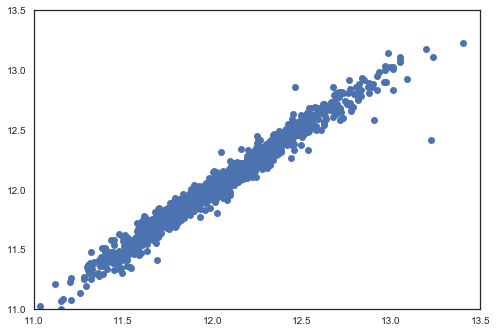

In [176]:
import matplotlib.pyplot as plt
plt.plot(las.predict(X_train),regr.predict(X_train),'o')
plt.xlim(11,13.5)
plt.ylim(11,13.5)

### 3.3.5 if we combine this two 

In [185]:
pred_w = 0.4*las.predict(X_val)+0.6*regr.predict(X_val)
cb_score = mean_squared_error(lg_y_val, pred_w)
print sqrt(cb_score)

0.110855040531


# 4. Submission

### random forest: score: 0.14860

In [115]:
rf_f = RandomForestRegressor(n_estimators = 100)
forest_f = rf_f.fit(X_train,y_train)
res_score = rf_f.score(X_val,y_val)
print res_score

0.940386357474


In [227]:
pred = rf_f.predict(X_test_a)
print pred.shape

(1459,)


### Xgboost score: 0.12621, reduced feature 0.12650

In [130]:
# Xgboost
pred = np.exp(regr.predict(X_test_a))

In [188]:
submission = pd.read_csv('sample_submission.csv')
submission.iloc[:,1] = pred
submission.to_csv('submission.csv',index = None)

### Lasso : 0.13268

In [172]:
pred = np.exp(las.predict(X_test_a))

### Lasso+Xgboost: 0.12465

In [187]:
pred_s = 0.4*las.predict(X_test_a)+0.6*regr.predict(X_test_a)
pred = np.exp(pred_s)